In [79]:
#Phase Estimation
#reference: https://community.qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html


### code specific initialization (importing libraries)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import *
import scipy

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

from qiskit.quantum_info.synthesis import euler_angles_1q 
from scipy.linalg import sqrtm
from cmath import exp
from math import cos, sin

### problem specific parameters

# matrix representation of linear equation
A = 0.5*np.array([[3,1],[1,3]])
t0 = 2*pi #time paramter appearing in the unitary
r = 10

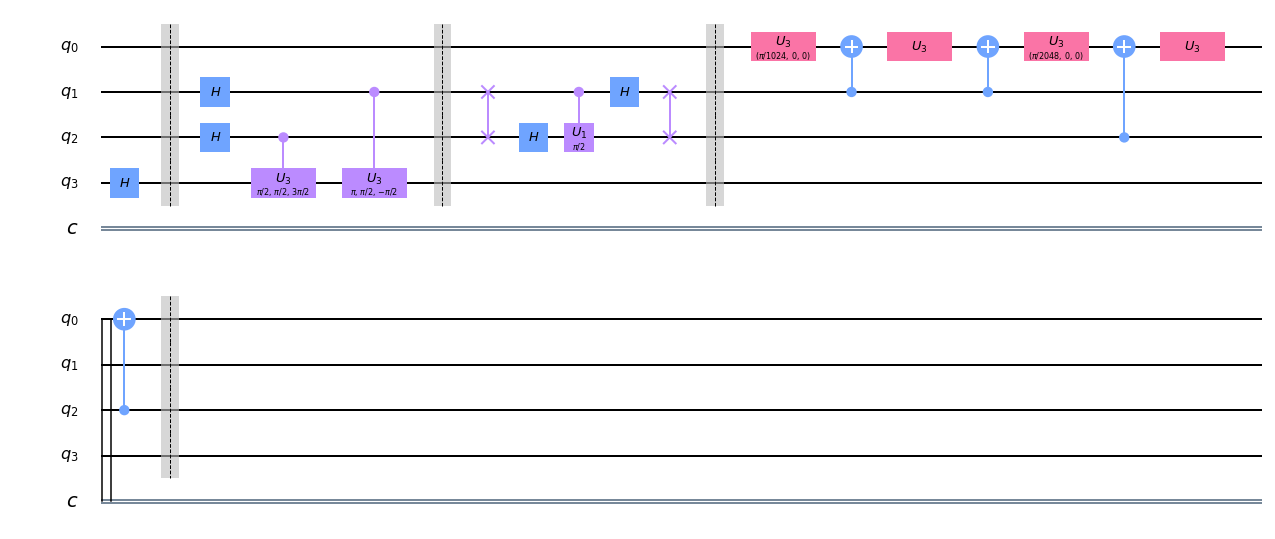

In [80]:
q = QuantumRegister(4, 'q')
c = ClassicalRegister(1, 'c')

qpe = QuantumCircuit(q,c)
qpe.h(q[3])
qpe.barrier()

qpe.h(q[1])
qpe.h(q[2])

# 1st unitary corresponding to A
UA = scipy.linalg.expm(complex(0,1)*A*t0/4)
[theta, phi, lmda] = euler_angles_1q(UA)
qpe.cu3(theta, phi, lmda,q[2],q[3])

# 2nd unitary corresponding to A
UA = scipy.linalg.expm(complex(0,1)*A*2*t0/4)
[theta, phi, lmda] = euler_angles_1q(UA)
qpe.cu3(theta, phi, lmda,q[1],q[3])
qpe.barrier()

# quantum fourier transform
qpe.swap(q[1],q[2])
qpe.h(q[2])
qpe.cu1(pi/2,q[1],q[2])
qpe.h(q[1])
qpe.swap(q[1],q[2])

qpe.barrier()

#controlled rotations gate
qpe.cry(2*pi/(2**r),q[1],q[0])
qpe.cry(pi/(2**r),q[2],q[0])

qpe.draw(output="mpl")
qpe.barrier()

qpe.draw(output="mpl")

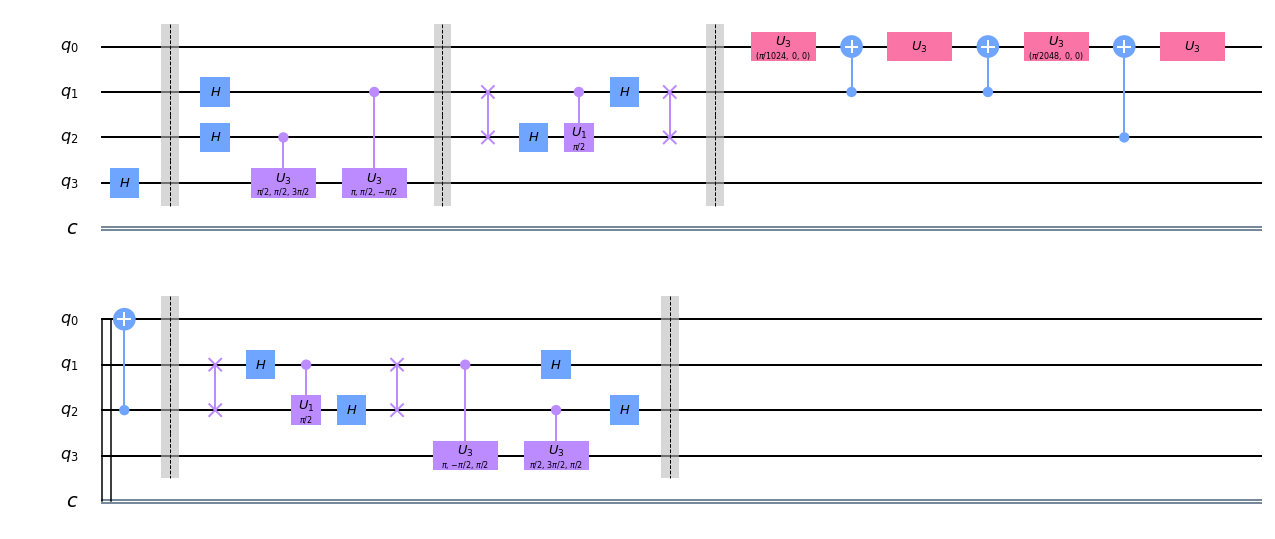

In [81]:
###############################################################

### uncomputation
# reversing fourier transform
qpe.swap(q[1],q[2])
qpe.h(q[1])
qpe.cu1(pi/2,q[1],q[2])
qpe.h(q[2])
qpe.swap(q[1],q[2])

# reversing 2nd unitary corresponding to A
UA = scipy.linalg.expm(complex(0,-1)*A*2*t0/4)
[theta, phi, lmda] = euler_angles_1q(UA)
qpe.cu3(theta, phi, lmda,q[1],q[3])

# reversing 1st unitary corresponding to A
UA = scipy.linalg.expm(complex(0,-1)*A*t0/4)
[theta, phi, lmda] = euler_angles_1q(UA)
qpe.cu3(theta, phi, lmda,q[2],q[3])

qpe.h(q[1])
qpe.h(q[2])

qpe.barrier()
qpe.draw(output="mpl")

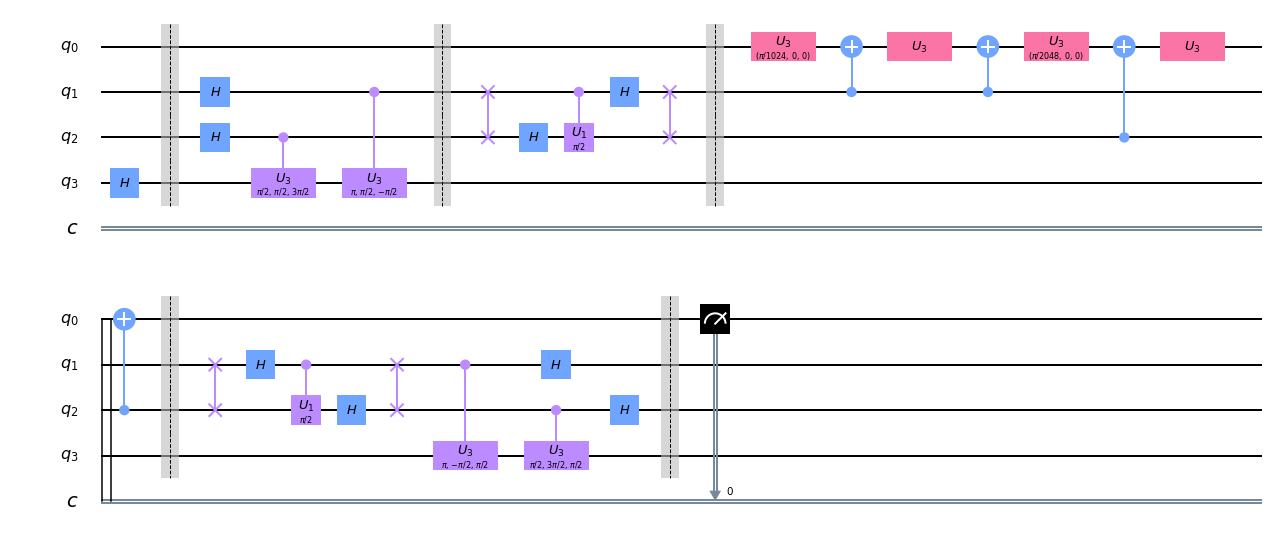

In [82]:
qpe.measure(q[0], c[0])
qpe.draw(output="mpl")

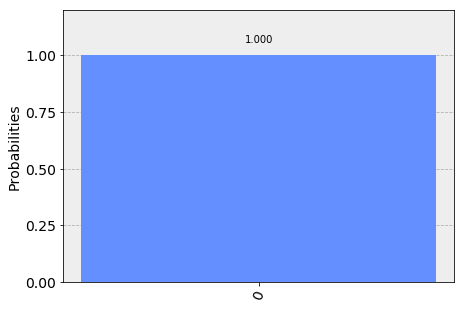

In [85]:
circuit = qpe
simulator = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 2048).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [84]:
from qiskit.quantum_info.synthesis import euler_angles_1q 
from scipy.linalg import sqrtm
from cmath import exp
from math import cos, sin

x_mat = np.array([[cos(theta/2),-exp(complex(0,lmda))*sin(theta/2)],[exp(complex(0,phi))*sin(theta/2), exp(complex(0,phi+lmda))*cos(theta/2)]])
x_mat.dot(x_mat)


array([[-4.4408921e-16+1.2246468e-16j, -1.8369702e-16-1.0000000e+00j],
       [-3.0616170e-16-1.0000000e+00j, -4.4408921e-16-1.2246468e-16j]])

In [109]:
UA = scipy.linalg.expm(complex(0,1)*A)
[theta, phi, lmda] = euler_angles_1q(UA)

In [112]:
UA = scipy.linalg.expm(complex(0,1)*A*2*pi/4)
UA

array([[-0.5+0.5j, -0.5-0.5j],
       [-0.5-0.5j, -0.5+0.5j]])

In [78]:
A.getH()


AttributeError: 'numpy.ndarray' object has no attribute 'getH'